## Day 08
- 14/dec/2021

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits import mplot3d

In [2]:
make_regression?

In [3]:
X , y , coef = make_regression(
    n_samples=200,
    n_features=2,
    bias=3,
    noise=10,
    coef=True,
)
print(X.shape , y.shape , coef)

(200, 2) (200,) [84.50016902 10.72458969]


In [4]:
X[:5,:]

array([[ 1.29034284,  0.3667103 ],
       [ 1.14955024, -0.80173693],
       [ 0.65450821, -1.00997621],
       [-1.90835621, -2.24094224],
       [ 1.06551308,  0.58993097]])

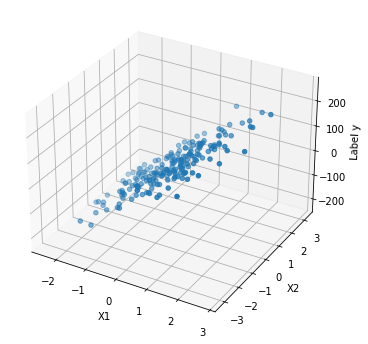

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label y")
plt.show()

In [6]:
class LinearRegressor:
    
    def predict(self, X):
        """ 
        X: Feature matrix (m, n)
        m is number of samples, n is no. of features
        """
        if self.w.shape[0] != X.shape[1]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)
        return X.dot(self.w)
    
    def loss(self, y, y_hat):
        return (y-y_hat).T.dot(y-y_hat)[0][0]
    
    def r_squared(self, y, y_hat):
        e_method = self.loss(y, y_hat)
        e_baseline = self.loss(y, y.mean())
        return 1-(e_method/e_baseline)
    
    def sum_of_residuals(self, y, yhat):
        return (y-yhat).sum()
    
    def __get_gradient(self, X, y, y_hat):
        grad = []
        for j in range(X.shape[1]):
            g = -2*((y - y_hat) * (X[:,j].reshape(-1,1))).sum()
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    def __gradient_descent(self, X, y, epochs, learning_rate, batch_size):
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X)//batch_size
        
        losses = []
        for i in range(epochs):
            for j in range(itr):
                X_batch, y_batch = X[j*batch_size : (j+1)*batch_size], y[j*batch_size : (j+1)*batch_size]
                y_hat_batch = self.predict(X_batch) 
                grad = self.__get_gradient(X_batch, y_batch, y_hat_batch)
                self.w = self.w - learning_rate*grad
                
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            losses.append(loss)
            r2 = self.r_squared(y, yhat)
            sor = self.sum_of_residuals(y, yhat)
            print(f"Epoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}")
#             print(f"\rEpoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}", end="")
            
        return losses
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, method='batch', **kwargs):
        """ 
        Trains the model. Finds the optimal weights in 
               y_hat = w0 + w1.x1 + w2.x2 + . . . + wn.xn
        X: Feature matrix (m,n)
        y: True Label vector (m,1)
        epochs: int value, no. of times you iterate over the entire data
        learning_rate: alpha in the update rule
        method: ('batch', 'mini-batch', 'stochastic')
        kwargs: variable keyword arguments, batch_size 
        """
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
            
        elif method == 'mini-batch':
            if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
                
        return self.__gradient_descent(X, y, epochs, learning_rate, batch_size)
        
        
            
        
        

In [9]:
lr = LinearRegressor()
epochs = 100
losses = lr.fit(X, y.reshape(-1,1), epochs=epochs, learning_rate=0.001, method='batch')

Epoch: 1/100 Loss: 530007.1802133912, r2: 0.6659660227275015, SoR: 499.94408256167395
Epoch: 2/100 Loss: 190172.83537898207, r2: 0.880144664181241, SoR: 120.28030557396193
Epoch: 3/100 Loss: 79400.99604553182, r2: 0.9499579788752892, SoR: -32.694281652149954
Epoch: 4/100 Loss: 43076.626580791555, r2: 0.9728512038299731, SoR: -80.82908981482717
Epoch: 5/100 Loss: 31090.1380264024, r2: 0.9804056193074047, SoR: -84.24389798484458
Epoch: 6/100 Loss: 27108.80231304106, r2: 0.9829148332441965, SoR: -71.43214183339865
Epoch: 7/100 Loss: 25777.370228882715, r2: 0.9837539606582073, SoR: -55.070099679531936
Epoch: 8/100 Loss: 25328.9771427181, r2: 0.984036557822066, SoR: -40.186345501958655
Epoch: 9/100 Loss: 25176.879037421782, r2: 0.9841324167782168, SoR: -28.29526770182234
Epoch: 10/100 Loss: 25124.90792204865, r2: 0.9841651712747963, SoR: -19.429121856615794
Epoch: 11/100 Loss: 25107.018755047025, r2: 0.984176445819419, SoR: -13.096031748014056
Epoch: 12/100 Loss: 25100.815928319018, r2: 0.9

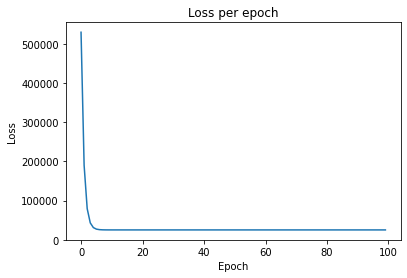

In [10]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

In [ ]:
Acuuracy = total no. of correct prediction / total no. of prediction

In [1]:
## positional arguments
def func(a , b):
    print(a)
    print(b)
    
func(10 ,20)

10
20


In [2]:
## keyword arguments
def func(a , b):
    print(a)
    print(b)
    
func(b = 20 , a = 10)

10
20


In [3]:
## kwargs - kw means keyword arguments and args mean argument
def func(a , b , **kwargs): #3 ------------------ we **kwargs we can give n no. of keyword arguments
    print(a)
    print(b)
    print(kwargs)
    
func(10 , 20 , i = 30 , j = 40 , k = 90) #--------------------------- i ,j,k keyword arguments

10
20
{'i': 30, 'j': 40, 'k': 90}
